In [663]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import requests

In [664]:
# Random UDG

n = 8 # numNode 
totalCount = 0 # numEdge
    
maxCount = 3
randomVal = 0

arbi = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3+5, 0, 4+5, 0, 0, 0],
    [0, 0, 0, 2, 0, 0, 5, 0],
    [0, 0, 0, 0, 0, 0, 0, 7],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 6+5, 0, 0, 2, 0, 0, 0],
    [0, 0, 0, 3, 0, 8, 0, 0],
    [0, 0, 0, 0, 0, 5, 4, 0],
])
arbi = arbi/20
# arbi = np.array([
#     [0, 5, 8, np.inf, np.inf, np.inf, np.inf, np.inf],
#     [np.inf, 0, 4, np.inf, 4, np.inf, np.inf, np.inf],
#     [np.inf, np.inf, 0, 2, np.inf, np.inf, 5, np.inf],
#     [np.inf, np.inf, np.inf, 0, np.inf, np.inf, np.inf, 7],
#     [1, np.inf, np.inf, np.inf, 0, np.inf, np.inf, np.inf],
#     [np.inf, 6, np.inf, np.inf, 2, 0, np.inf, np.inf],
#     [np.inf, np.inf, np.inf, 3, np.inf, 8, 0, np.inf],
#     [np.inf, np.inf, np.inf, np.inf, np.inf, 5, 4, 0],
# ])

for i in range(n):
    for j in range(n):
        if arbi[i][j]==np.inf or arbi[i][j]==0:
            continue
        totalCount += 1
edgeArray = np.zeros([totalCount,3])  
count = 0          
for i in range(n):
    for j in range(n):
        if(arbi[i,j] != 0 and arbi[i][j]!=np.inf):
            edgeArray[count, 0] = i + 1
            edgeArray[count, 1] = j + 1
            edgeArray[count, 2] = arbi[i,j]
            count+=1
                
nodeArray = np.zeros([n,2])             
for i in range(n):
    print("W", i + 1)
    nodeArray[i,0] = i + 1
    nodeArray[i,1] = 1 # node weight
    
print("R", 1)    


W 1
W 2
W 3
W 4
W 5
W 6
W 7
W 8
R 1


In [665]:
arbi

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.4 , 0.  , 0.45, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.35],
       [0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.55, 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.15, 0.  , 0.4 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.2 , 0.  ]])

In [666]:
root = terminal = -1

G = nx.Graph()
for i in range(totalCount):
    G.add_edge(int(edgeArray[i,0]), int(edgeArray[i,1]), weight=float(edgeArray[i,2]))
for i in range(n):
    G.add_node(int(nodeArray[i,0]), weight = float(nodeArray[i,1]),root = 0)
root = 1
G.nodes[root]['root'] = 1

graph = G

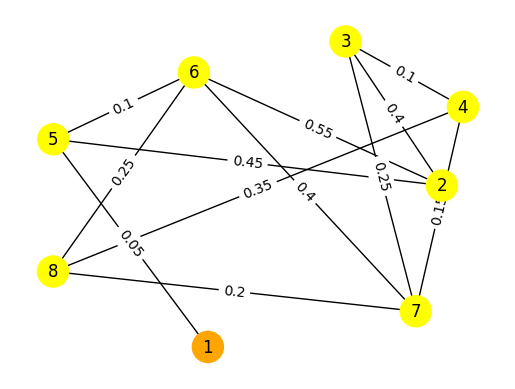

In [667]:
# [이슈 2번]이거 구버전으로 돌리면 괜찮은데, python 버전 문제인지, networkx 버전 문제인지, 충돌일어나서 좀 해결해야할듯.
pos = nx.spring_layout(graph, k = 5/np.sqrt(graph.order())) # https://dustinoprea.com/2015/07/25/using-networkx-to-plot-graphs/
edge_labels = { (u,v): d['weight'] for u,v,d in graph.edges(data=True) }
nx.draw_networkx(graph,
                 pos,
                 node_size=500,
                 node_color=['orange' if v==1 else 'yellow' for _, v in graph.nodes(data='root')])
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.axis('off')
plt.show()

In [668]:
edge_labels

{(2, 3): 0.4,
 (2, 5): 0.45,
 (2, 6): 0.55,
 (3, 4): 0.1,
 (3, 7): 0.25,
 (5, 1): 0.05,
 (5, 6): 0.1,
 (4, 8): 0.35,
 (4, 7): 0.15,
 (7, 6): 0.4,
 (7, 8): 0.2,
 (8, 6): 0.25}

## Message Definition
* $A_{j\rightarrow i} ^d (t+1) = \sum_{k \in N(j) \backslash i }E_{k\rightarrow j}^d(t) + \max_{k \in N(j) \backslash i } (A^{d-1}_{k\rightarrow j}(t)-E^d_{k\rightarrow j}(t)-s_{j\rightarrow k}+\gamma*F_{j\rightarrow k} ^d(t))$
* $B_{j\rightarrow i}(t) = -s_{j*}+\sum_{k \in N(j)\backslash i}D_{k\rightarrow j} +\gamma*G_j$
* $C_{j\rightarrow i} ^d (t+1)=\ -s_{j\rightarrow i}+\sum_{k \in N(j) \backslash i }(E^d_{k\rightarrow j}(t))+\gamma*F_{j\rightarrow i} ^d(t)$
* $D_{j\rightarrow i}(t) = \max(\max_{d}A_{j\rightarrow i}^d(t), B_{j\rightarrow i}(t))$
* $E_{j\rightarrow i} ^d (t+1)= \max (C_{j\rightarrow i}^d(t+1), A_{j\rightarrow i}^d(t+1))$
* $G_{j}(t+1) = -s_{j*}+\sum_{k \in N(j)} D_{k\rightarrow j}(t)+\gamma*G_j(t)$
* $F_{j\rightarrow i}^d (t+1)  = \sum_{k \in N(j)} E_{k\rightarrow j}(t) -s_{j\rightarrow i} - E_{i\rightarrow j}^d(t) +A_{ij}^{d-1}(t)+\gamma*F_{j\rightarrow i} ^d(t) = C_{j\rightarrow i} ^d (t+1) + A_{i\rightarrow j}^{d-1}(t)$

In [669]:
# Initial PARAMETER
lbda = 1 # damping
iter_num = 33 # Maximum iteration # Tentative Method 적용 가능성도 생각해봐야함 (이전에 말씀해주셨던거)
rein = 0 # reinforcement parameter: gamma // 이거 안쓰는듯 
neg_inf = -1e10
pos_inf = 1e10
depth = n #(이슈 3번 : Max Search Depth = 5라는 소리인지, 아니면 다른 의미인지 봐야함)

In [670]:
node_num = graph.number_of_nodes()
#adj_matrix = nx.to_numpy_matrix(graph,nodelist=np.arange(1,node_num+1))

adj_matrix = nx.to_numpy_array(graph,nodelist=np.arange(1,node_num+1))
adj_matrix = np.matrix(adj_matrix)
adj_bool = (adj_matrix == 0) # 0있는 자리가 True
ind = np.arange(0, node_num)
adj_bool_3d = [adj_bool]*depth

In [671]:
adj_matrix

matrix([[0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.4 , 0.  , 0.45, 0.55, 0.  , 0.  ],
        [0.  , 0.4 , 0.  , 0.1 , 0.  , 0.  , 0.25, 0.  ],
        [0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.15, 0.35],
        [0.05, 0.45, 0.  , 0.  , 0.  , 0.1 , 0.  , 0.  ],
        [0.  , 0.55, 0.  , 0.  , 0.1 , 0.  , 0.4 , 0.25],
        [0.  , 0.  , 0.25, 0.15, 0.  , 0.4 , 0.  , 0.2 ],
        [0.  , 0.  , 0.  , 0.35, 0.  , 0.25, 0.2 , 0.  ]])

In [672]:
vertex_weight = np.array(list(dict(graph.nodes(data='weight')).values()), dtype=float)
adj_matrix = np.ma.array(adj_matrix, mask=(adj_matrix == 0))

In [673]:
# Message Initialization
# Assume every messeage matrix is inversed in initial! (except d; j->i)
A = np.ma.array(-np.random.rand(depth, node_num, node_num), mask=adj_bool_3d)
B = np.ma.array(-np.random.rand(node_num, node_num), mask=adj_bool)
C = np.ma.array(np.full((depth, node_num, node_num), neg_inf), mask=adj_bool_3d)
D = np.ma.array(np.maximum(np.amax(A,axis=0), B))

E = np.ma.zeros((depth, node_num, node_num)) # Needs optimization
for d in range(0, depth, 1):
  if d == depth-1:
    E[d,:,:] = np.copy(D)
  else:
    E[d,:,:] = np.maximum(-np.random.rand(node_num, node_num), D)

G = np.zeros(node_num)
F = np.ma.array(np.zeros((depth, node_num, node_num)), mask=adj_bool_3d)

In [674]:
# ROOT 인덱스에 대해 전처리
B[:,root-1].fill(neg_inf)
A[:,:,root-1].fill(neg_inf)
A[0,:,root-1].fill(0)
E[:,:,root-1].fill(0)
D[:,root-1].fill(0)

In [675]:
adj_matrix = np.array(adj_matrix.transpose()) ## s_{j->i}
# Variable Definition: A[d,j,i]
sumE = np.ma.array(np.zeros((depth, node_num, node_num)), mask=adj_bool_3d)

In [676]:
for _ in range(0, iter_num, 1): 
  old_A=np.ma.copy(A)
  
  for d in range(0, depth, 1): # depth zero is root, depth-1 is terminal;
    sumE[d,:,:] = np.ma.array(np.tile(np.sum(E[d,:,:].transpose(),axis=0),(node_num,1)), mask=adj_bool) # k->j
    
    if d == 0:
      cEA = np.ma.array(np.full((node_num, node_num), neg_inf), mask=adj_bool)
    else:
      cEA = old_A[d-1,:,:].transpose()-E[d,:,:].transpose()-adj_matrix+rein*F[d,:,:]
    
    # remove elements that column position is equivalent to maximum position (max within row)
    I = np.argmax(cEA, axis=0)
    Y = cEA[I,ind]
    maxcEA=np.ma.array(np.tile(Y,(node_num,1)), mask=adj_bool)
    cEA[I,ind] = neg_inf
    Y2 = np.max(cEA, axis=0)
    maxcEA[I,ind] = Y2

    sumEp=sumE[d,:,:]-E[d,:,:].transpose()
    A[d,:,:] = sumEp + maxcEA

  A[:,:,root-1].fill(neg_inf)
  A[0,:,root-1].fill(0)

  Dt = D.transpose() # i->j
  sumD_before_tile = np.sum(Dt,axis=0)
  sumD = np.ma.array(np.tile(sumD_before_tile,(node_num, 1)), mask=adj_bool) # k->j
  sumDp = sumD - Dt # k->j
  
  B = -vertex_weight+sumDp+rein*G # vertex_weight & G: broadcast!
  B[:,root-1].fill(neg_inf)
  
  D = np.maximum(np.amax(A,axis=0), B) # D(t+1)
  D[:,root-1].fill(0)
  
  for d in range(depth-1, -1, -1):
    C[d,:,:] = -adj_matrix + sumE[d,:,:]-E[d,:,:].transpose() + rein*F[d,:,:] # C(t+1)
    C[d,:,root-1].fill(neg_inf)
    
    if d == depth-1 or d == 0:
      E[d,:,:] = np.copy(D)
    else:
      E[d,:,:] = np.maximum(C[d+1,:,:], D)  # E(t+1)
    
    if d == 0:
      F[d,:,:].fill(neg_inf)
    else:
      F[d,:,:] = C[d,:,:] + old_A[d-1,:,:].transpose()
  E[:,:,root-1].fill(0)
  F[:,:,root-1].fill(0)

  # reduce
  m = np.maximum(np.amax(A,axis=0),np.amax(E,axis=0))
  m = np.maximum(m,B)
  m = np.maximum(m,D)
  D -= m
  B -= m
  A -= m # depth-wise
  E -= m # depth-wise
  
  G = -vertex_weight + sumD_before_tile + rein*G # s_{c,null}
  G[root-1] = 0
  
  D[:,root-1].fill(0)
  B[:,root-1].fill(neg_inf)
  A[:,:,root-1].fill(neg_inf)
  A[0,:,root-1].fill(0)
  E[:,:,root-1].fill(0)
  # CHALLENGE: node weight-> varies by depth

In [677]:
# marginal
dF=np.amax(F,axis=0)  #maximum depth-wise; j->i
maxtot=np.max(dF,axis=0)  #maximum F; any node that pointing i
maxtot=np.tile(maxtot, (node_num,1))
maxtoedge=np.zeros([n])

che = np.zeros([n])
che[0] = 1
p = 0
for d in range(n-1):
    max_val = neg_inf-1
    arg_max = -1
    for i in range(n):
        if che[i]==1 : continue
        if arg_max == -1 : arg_max = i
        if max_val <= F[d][p][i]:
            max_val = F[d][p][i]
            idx_max = i
    che[idx_max] = 1
    maxtoedge[idx_max] = p
    p = idx_max
        

alive_edge = (maxtot > np.tile(G[:,None],(1, node_num))) #G의 각 row는 모두 동일-> column 추출
alive_edge[root-1] = False
alive_edge = (alive_edge) & ~(adj_bool)

rows, cols = np.where(alive_edge==True)
acceptable_edges = [(x, y) for x, y in zip(rows+1, cols+1)]

In [678]:
print(alive_edge)

[[False False False False False False False False]
 [False False  True False  True  True False False]
 [False  True False  True False False  True False]
 [False False  True False False False  True  True]
 [ True  True False False False  True False False]
 [False  True False False  True False  True  True]
 [False False  True  True False  True False  True]
 [False False False  True False  True  True False]]


In [679]:
maxtoedge

array([0., 2., 3., 6., 0., 4., 7., 5.])

In [680]:
eligible_edges = [(x, y) for x, y in zip(ind+1, maxtoedge+1)]
eligible_edges.pop(root-1) # (root-1) position in maxtoedge should be blocked!
tree_edges = list(set(eligible_edges).intersection(acceptable_edges))

In [681]:
eligible_edges

[(2, 3.0), (3, 4.0), (4, 7.0), (5, 1.0), (6, 5.0), (7, 8.0), (8, 6.0)]

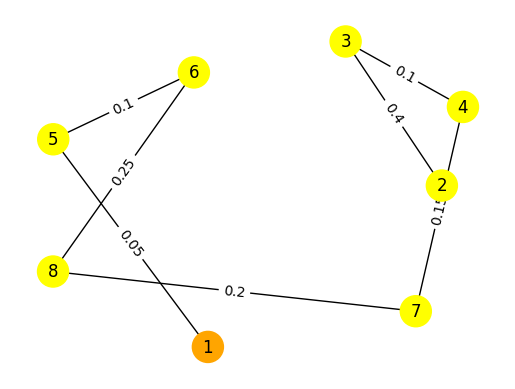

In [682]:
# 원래 그래프의 subgraph인 H 그리기
H = graph.edge_subgraph(tree_edges)
H_edge_labels = { (u,v): d['weight'] for u,v,d in H.edges(data=True) }
nx.draw_networkx(H,
                 pos,
                 node_size=500
                 ,node_color=['orange' if v==1 else 'yellow' for _, v in graph.nodes(data='root')]
                )
nx.draw_networkx_edge_labels(H, pos, edge_labels = H_edge_labels)
plt.axis('off')
plt.show()

In [683]:
print(nx.is_tree(H)) # 결과가 트리인지 검사
print(H.size(weight='weight'))  # 결과의 cost 계산

True
1.25


In [684]:
print(G)

[0.0 -1.0 -1.2 -1.25 -1.25 -1.1 -1.15 -1.05]


In [685]:
print("기존 edge 갯수",len(edge_labels))
print("현재 edge 갯수",len(H_edge_labels))

기존 edge 갯수 12
현재 edge 갯수 7


In [686]:
print(1)

1
